# Short Exercise: K-Nearest Neighbors (K-NN)

In this tutorial, you will be building a simple classifier using K-NN model that will attempt to classify whether a student will be admitted into the school based on their examp score

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [32]:
df = pd.read_csv('exam_data.csv')

In [33]:
df.shape

(100, 3)

In [34]:
df.head(10)

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [35]:
X = df[['Exam1','Exam2']]
y = df['Admitted']

# Visualising the dataset

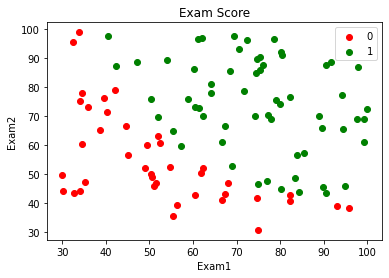

In [36]:
plt.scatter(X[y == 0]["Exam1"], X[y == 0]["Exam2"], c = 'red', label = 0)
plt.scatter(X[y == 1]["Exam1"], X[y == 1]["Exam2"], c = 'green', label = 1)
plt.title('Exam Score')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

## Feature Scaling

Do we need this?

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

Use 70%-30% training-testing ratio

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the K-NN model on the Training set

Pick your choice of neighbors, but do try multiple values

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

## Predicting the Test set results

In [41]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Plotting the Confusion Matrix

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [43]:
(y_pred == y_test).sum() / y_test.shape[0]

0.9333333333333333

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.9333333333333333


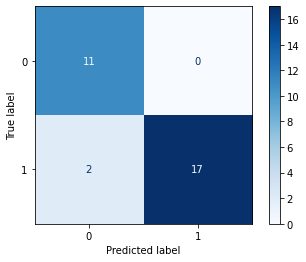

In [44]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(classifier,X_test, y_test,cmap="Blues");
print("accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


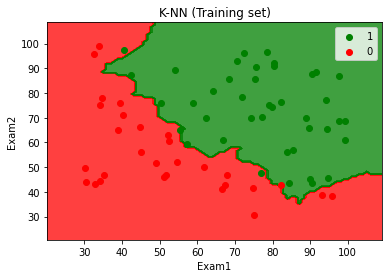

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors=['red','green']
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Training set)')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


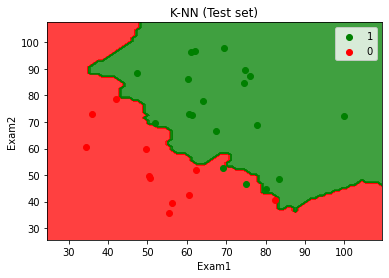

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Test set)')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()